In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

In [2]:
exc154_data=pd.read_csv("exc_154_larval_data - Sheet1.csv")
exc154_data

,Dots,Area,Transcript Density,Genotype,Tissue
0,473,17274.270220,0.027382,Exc154 homozygous,Antenna
1,271,14854.061750,0.018244,Exc154 homozygous,Antenna
2,1106,13147.054600,0.084125,WT,Antenna
3,252,10228.575410,0.024637,Exc154 homozygous,Antenna
4,439,12315.313010,0.035647,Exc154 homozygous,Antenna
5,639,14597.593600,0.043774,Exc154 hemizygous,Antenna
6,1276,15715.713400,0.081193,Exc154 hemizygous,Antenna
7,1102,13541.379300,0.081380,Exc154 hemizygous,Antenna
8,1385,15492.529300,0.089398,Exc154 hemizygous,Antenna
9,893,13287.394700,0.067207,Exc154 hemizygous,Antenna


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Antenna_Exc154 homozygous v.s. Antenna_Exc154 hemizygous: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.245e-02 U_stat=0.000e+00
Antenna_WT v.s. Antenna_Exc154 homozygous: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.245e-02 U_stat=3.000e+01
Antenna_WT v.s. Antenna_Exc154 hemizygous: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.200e+01
Antenna_WT v.s. Early Pulse_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.245e-02 U_stat=3.000e+01


Text(1.25,0.002,'n= 6')

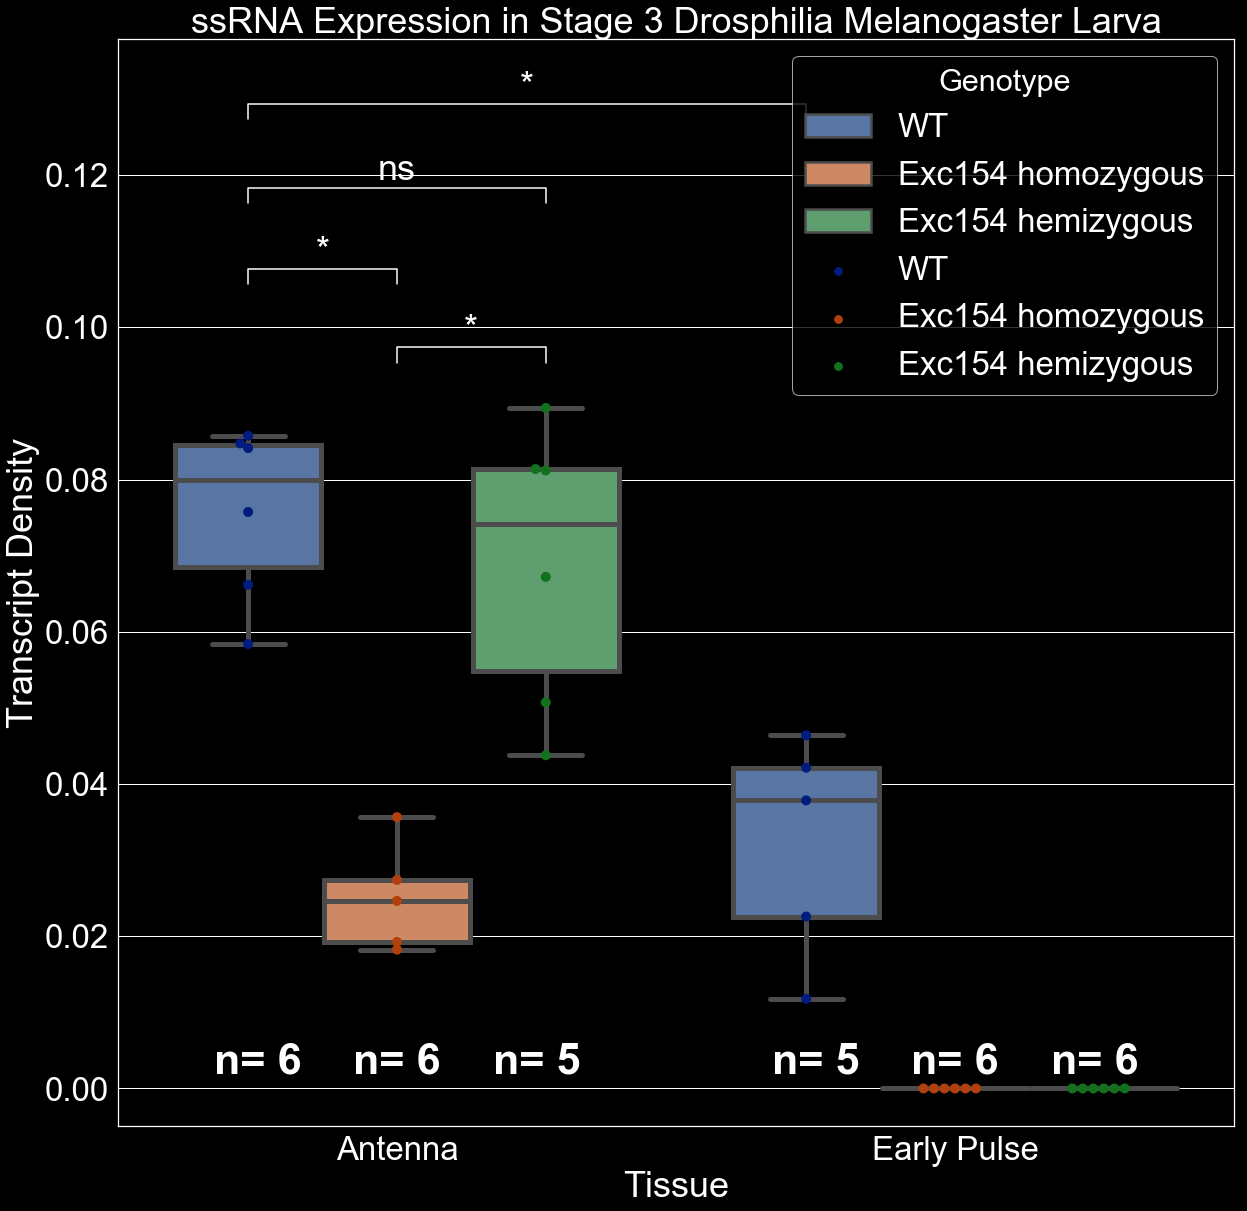

In [33]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(20,20))
#sns.set(font_scale=3)
sns.boxplot(ax=ax,x="Tissue",y="Transcript Density",data=exc154_data,hue="Genotype",order=["Antenna","Early Pulse"],hue_order=["WT","Exc154 homozygous","Exc154 hemizygous"],palette="deep",linewidth=5).set_title("ssRNA Expression in Stage 3 Drosphilia Melanogaster Larva")
sns.swarmplot(ax=ax,x="Tissue",y="Transcript Density",data=exc154_data,hue="Genotype",order=["Antenna","Early Pulse"],hue_order=["WT","Exc154 homozygous","Exc154 hemizygous"],dodge=True,size=10,palette="dark")
box_pairs=[
    (("Antenna","Exc154 homozygous"),("Antenna","Exc154 hemizygous")),
    (("Antenna","WT"),("Antenna","Exc154 hemizygous")),
    (("Antenna","Exc154 homozygous"),("Antenna","WT")),
    (("Antenna","WT"),("Early Pulse","WT"))
]

add_stat_annotation(ax, data=exc154_data, hue="Genotype", x="Tissue", y="Transcript Density", order=["Antenna","Early Pulse"],hue_order=["WT","Exc154 homozygous","Exc154 hemizygous"],
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,color='w')
#adds n values
exc154_count=exc154_data.groupby(['Tissue', 'Genotype']).count()
exc154_count=exc154_count.reindex(["WT","Exc154 hemizygous","Exc154 homozygous"],level="Genotype")
nobs=[]
for a in exc154_count["Dots"]:
    nobs.append("n= " + str(a))


pos = range(len(nobs))

ax.text(-0.25, 0.002, nobs[0], horizontalalignment='center', size='large', color='white', weight='semibold') 
ax.text(0, 0.002, nobs[1], horizontalalignment='center', size='large', color='white', weight='semibold')    
ax.text(0.25, 0.002, nobs[2], horizontalalignment='center', size='large', color='white', weight='semibold')
ax.text(0.75, 0.002, nobs[3], horizontalalignment='center', size='large', color='white', weight='semibold')
ax.text(1, 0.002, nobs[4], horizontalalignment='center', size='large', color='white', weight='semibold')
ax.text(1.25, 0.002, nobs[5], horizontalalignment='center', size='large', color='white', weight='semibold')